In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm, rcParams
import scipy.constants as sc
from scipy.optimize import newton
rcParams['figure.figsize'] = (4,2)

#### toy model

In [48]:
P = 300
R = np.logspace(np.log10(0.1), np.log10(400), P+1) # in au
c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R


sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2

u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega

# a_min = 0.03 / 1e4 # minimum grain size in cm, input in microns
a_min = 0.001 / 1e4 # minimum grain size in cm, input in microns
a_max = 1000 / 1e4 # maximum grain size in cm, input in microns
M = int(1e4) # number of grain sizes
a = np.logspace(np.log10(a_min), np.log10(a_max), M+1) # generate grain size list (log dist)N = 400

k = sdot/rhos/Omega # in cm

In [55]:
np.argmin(np.abs([i-3e-5 for i in min_grain_size])) # find the index of the closest value to 3e-5 in
R[218]

41.44736513068767

In [ ]:
np.argmin(np.abs(R - 0.25))

Text(0, 0.5, '$a_\\mathrm{esc}$ / cm')

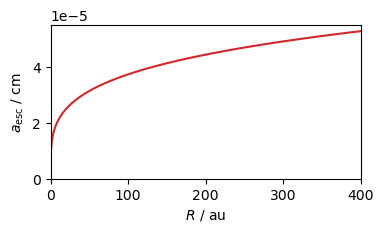

In [49]:
# minimum grain size to settle
idx_ls_R = [np.sum(i > (2 * a / 3**1.5)) for i in (k*H_R)]
min_grain_size = [a[s-1] for s in idx_ls_R if s > 0]
plt.plot(R, min_grain_size, c='C3')
plt.xlim(0, 400)
plt.ylim(0)
plt.xlabel(r'$R$ / au')
plt.ylabel(r'$a_\mathrm{esc}$ / cm')

In [22]:
# now change the surface mass loss rate
sdot_ref = 10**np.linspace(-14, -10, 5) # in g/cm2/s

def calc_min_grain_size(sdot):
    k = sdot/rhos/Omega
    idx_ls_R = [np.sum(i > (2 * a / 3**1.5)) for i in (k*H_R)]
    return [a[s-1] for s in idx_ls_R if s > 0]

escape_list = []
for i in sdot_ref:
    sdot_loc = i * (R/10)**(-1.5)
    escape_list.append(calc_min_grain_size(sdot_loc))



In [39]:
sdot_loc = sdot_ref[0] * (R/10)**(-1.5)
k = sdot_loc/rhos/Omega
test = np.array([np.sum(i > (2 * a / 3**1.5)) for i in (k*H_R)])
test = np.where(test==0, np.nan, test)
# test[np.sum(np.isnan(test))]
test[np.sum(np.isnan(test))]

2.0